In [1]:
from matplotlib import pyplot as plt
import pandas as pd

from dotblotr.viz import plot_cplot

# Consolidated plot demo
In this example, we make a "consolidated plot" (cplot) of our processed hit data.

## Load the results
We start with a `results_table` dataframe we generated previously using `process_dir()` (see `mult_file_example.ipynb`). We load the dataframe from the csv file using pandas.

In [2]:
# load the results_table dataframe
filepath = '/Users/kevin.yamauchi/Downloads/results_table_yocsv.csv'
results_table = pd.read_csv(filepath)

# view the first few rows
results_table.head()

,assay_id,strip_id,dot_name,source_plate_id,source_plate_row,source_plate_column,exp_group,zscore_threshold,top_hit,top_hit_pct,...,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,positive_threshold,pos_hit
0,assay_config_anti-yo1.csv,10-D166-RETAKE,A1,Anti-Yo_1,A,1,neg,3,gi|8922528|ref|NP_060613.1|_kelch-like_protein...,0.999416,...,0.0,0.0,70.050697,155.690748,109.680608,789.0,39.125475,0.356722,0.370462,False
1,assay_config_anti-yo1.csv,10-D166-RETAKE,A2,Anti-Yo_1,A,2,neg,3,gi|8922528|ref|NP_060613.1|_kelch-like_protein...,0.999038,...,0.0,1.0,146.977025,138.094317,116.136638,827.0,41.033857,0.353324,0.370462,False
2,assay_config_anti-yo1.csv,10-D166-RETAKE,A3,Anti-Yo_1,A,3,neg,3,gi|768014235|ref|XP_011527626.1|_PREDICTED:_si...,0.512000,...,0.0,2.0,225.736111,157.111111,116.397222,720.0,40.301389,0.346240,0.370462,False
3,assay_config_anti-yo1.csv,10-D166-RETAKE,A4,Anti-Yo_1,A,4,exp,3,gi|154759283|ref|NP_055418.2|_cerebellar_degen...,0.967334,...,0.0,3.0,308.009211,157.903947,136.776316,760.0,48.197368,0.352381,0.370462,False
4,assay_config_anti-yo1.csv,10-D166-RETAKE,A5,Anti-Yo_1,A,5,neg,3,gi|768009744|ref|XP_011525359.1|_PREDICTED:_pr...,0.763386,...,0.0,4.0,394.274242,168.039394,115.662121,660.0,40.145455,0.347092,0.370462,False


## Filter the results
In this example we will inspect the results and we are interested in the purity of the immunoreagents used in the blot. Here, we filter the results int he results_df for the hits where `top_hit_pct > 0.7`.

In [3]:
# Get the rows where the top_hit_pct greather than the threshold
purity_thresh = 0.7
pure_df = results_table.loc[results_table.top_hit_pct > purity_thresh]
pure_df.head()

,assay_id,strip_id,dot_name,source_plate_id,source_plate_row,source_plate_column,exp_group,zscore_threshold,top_hit,top_hit_pct,...,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,positive_threshold,pos_hit
0,assay_config_anti-yo1.csv,10-D166-RETAKE,A1,Anti-Yo_1,A,1,neg,3,gi|8922528|ref|NP_060613.1|_kelch-like_protein...,0.999416,...,0.0,0.0,70.050697,155.690748,109.680608,789.0,39.125475,0.356722,0.370462,False
1,assay_config_anti-yo1.csv,10-D166-RETAKE,A2,Anti-Yo_1,A,2,neg,3,gi|8922528|ref|NP_060613.1|_kelch-like_protein...,0.999038,...,0.0,1.0,146.977025,138.094317,116.136638,827.0,41.033857,0.353324,0.370462,False
3,assay_config_anti-yo1.csv,10-D166-RETAKE,A4,Anti-Yo_1,A,4,exp,3,gi|154759283|ref|NP_055418.2|_cerebellar_degen...,0.967334,...,0.0,3.0,308.009211,157.903947,136.776316,760.0,48.197368,0.352381,0.370462,False
4,assay_config_anti-yo1.csv,10-D166-RETAKE,A5,Anti-Yo_1,A,5,neg,3,gi|768009744|ref|XP_011525359.1|_PREDICTED:_pr...,0.763386,...,0.0,4.0,394.274242,168.039394,115.662121,660.0,40.145455,0.347092,0.370462,False
5,assay_config_anti-yo1.csv,10-D166-RETAKE,A6,Anti-Yo_1,A,6,exp,3,gi|154759283|ref|NP_055418.2|_cerebellar_degen...,0.807102,...,0.0,5.0,462.018229,162.585938,131.125000,768.0,44.566406,0.339877,0.370462,False


## Plot the results

Finally, we will plot the results. We will use the `plot_cplot()` function (see the docstring below for information about the parameters) to generate the plot. We are happy with the default parameters, so we only need to provide the `results_table` dataframe. Note that we are using the dataframe we filtered above. In this plot, the size of the points is set by the number of positive hits.

```
    Parameters:
    ------------
    results_table : pd.DataFrame
        The results table output from process_dir() from which to get the strip info
    vertical_var : str
        The column name in results_table to use for the vertical axis variable
    vert_sort_order : str
        The order the vertical axis should be sorted by.
        Can be 'ascending' (lowest value by the horizontal axis)
        or 'descending' (highest value by the horizontal axis.
        The default value is 'descending'.
    horizonta_var : str
        The column name in results_table to use for the horizontal axis varible.
        The default value is 'strip_id'
    color_var : str
        The column name in results_table to use to color to points.
        The default value is 'top_hit_pct'
    cmap : str
        The name of the colormap for coloring the points. The default value is 'inferno'.
        See: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
    cbar_label : str
        The value for the colorbar label. The default value is 'Purity'

    Returns:
    --------
    f
        matplotlib figure object
    ax
        matplotlib axis object
    ```

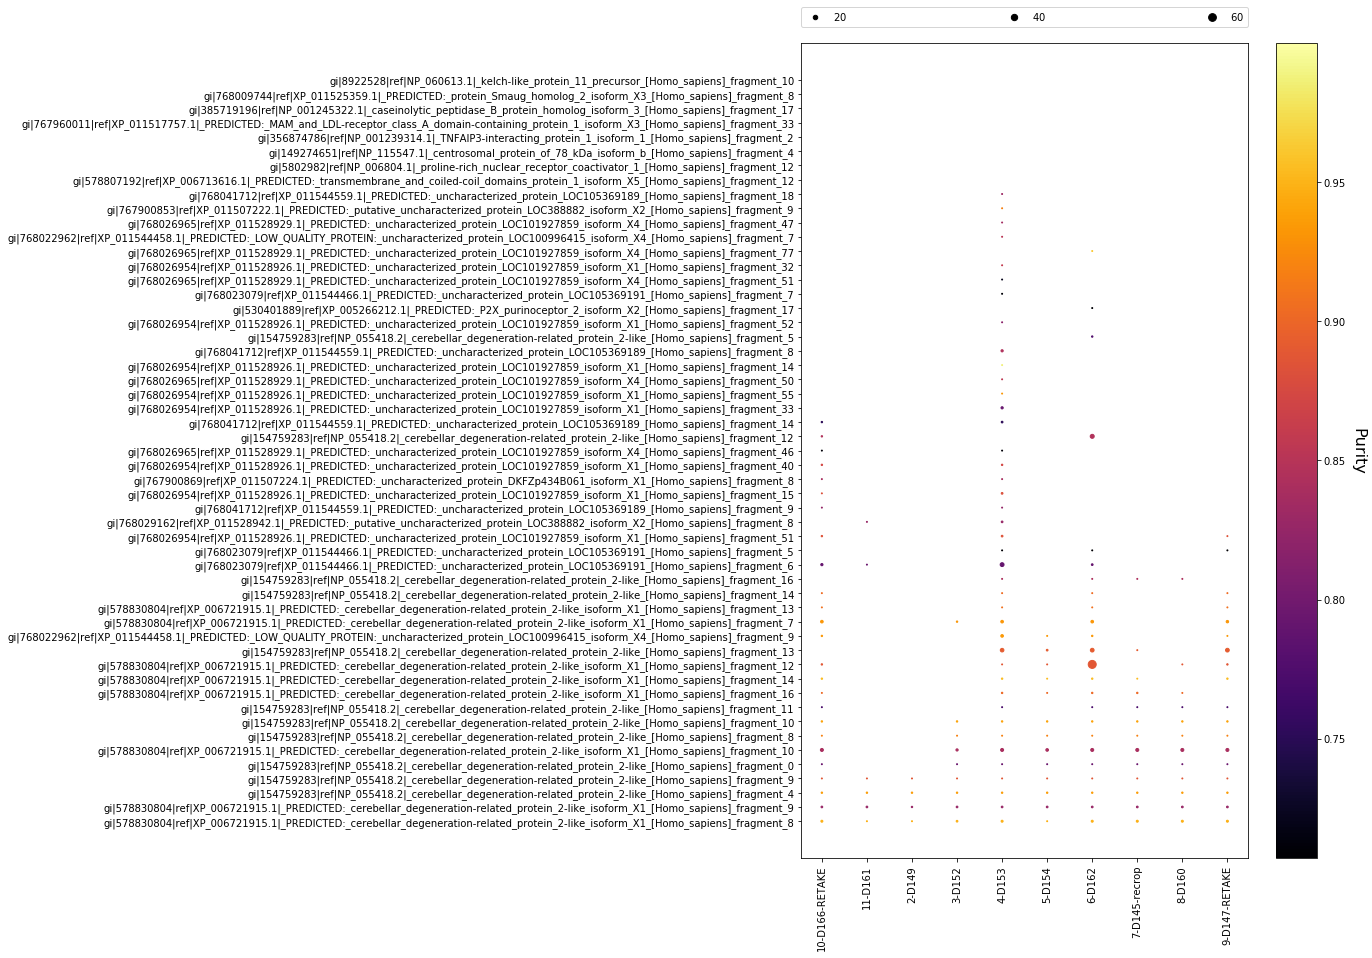

In [4]:
# Plot the figure
f, ax = plot_cplot(pure_df)

# save the figure
f.savefig('cplot.png', dpi=300, bbox_inches='tight')